
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

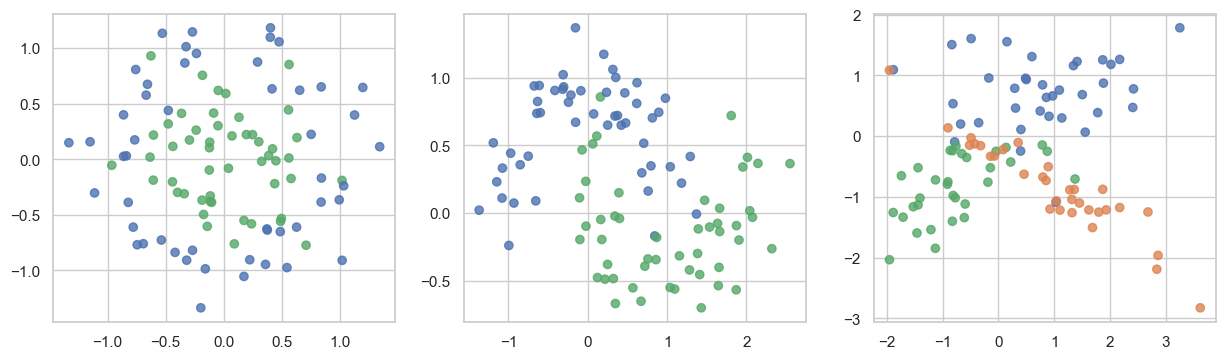

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?


Датасет: Circles
Accuracy на обучающей выборке: 1.0000
Accuracy на тестовой выборке: 0.7000
Разность (переобучение): 0.3000

Датасет: Moons
Accuracy на обучающей выборке: 1.0000
Accuracy на тестовой выборке: 0.9333
Разность (переобучение): 0.0667

Датасет: Classification
Accuracy на обучающей выборке: 1.0000
Accuracy на тестовой выборке: 0.6667
Разность (переобучение): 0.3333


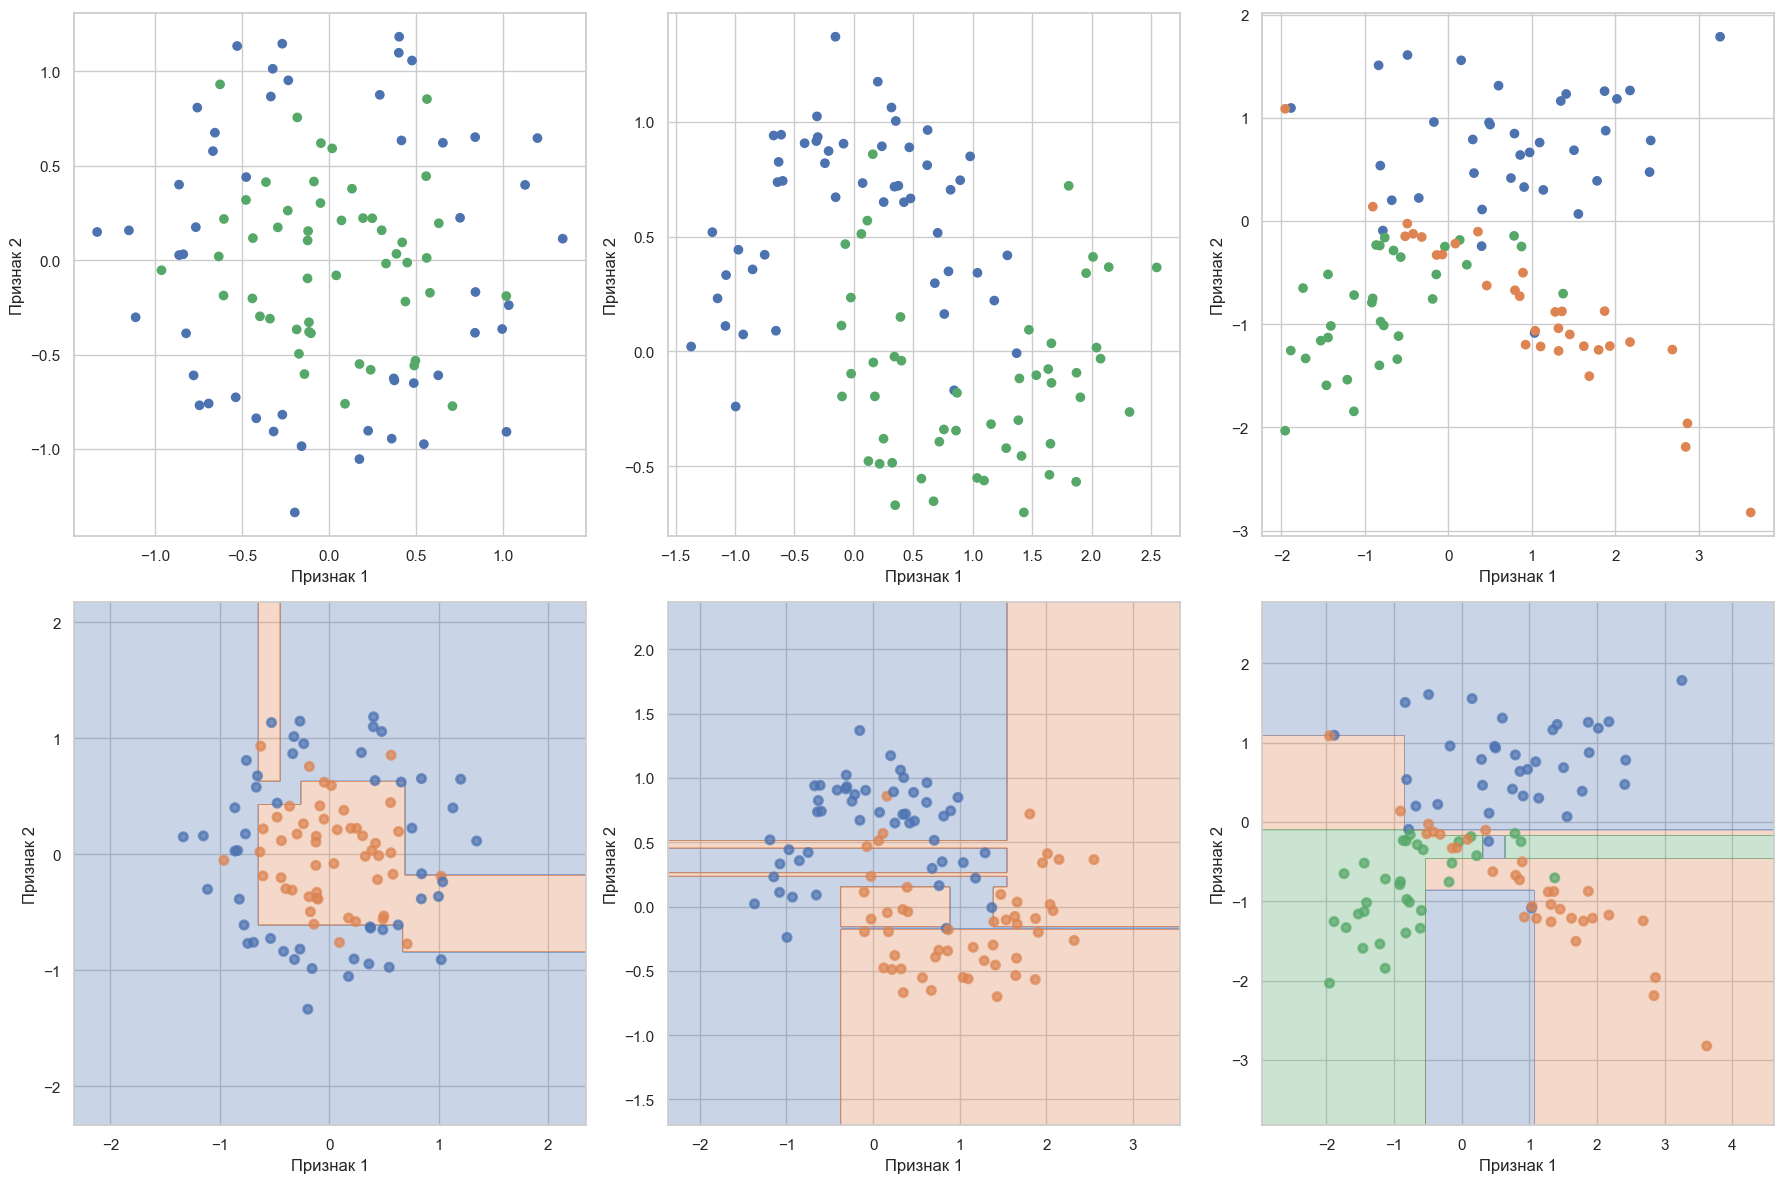

In [17]:
from sklearn.metrics import accuracy_score

def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

dataset_names = ['Circles', 'Moons', 'Classification']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (X, y) in enumerate(datasets):
    print(f"\n{'='*50}")
    print(f"Датасет: {dataset_names[i]}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Accuracy на обучающей выборке: {train_accuracy:.4f}")
    print(f"Accuracy на тестовой выборке: {test_accuracy:.4f}")
    print(f"Разность (переобучение): {train_accuracy - test_accuracy:.4f}")
    
    plt.subplot(2, 3, i + 1)
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    
    plt.subplot(2, 3, i + 4)
    plot_surface(clf, X, y)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()


Ответ: Переобучение деревьев можно заметить по тонким линиям предназначенным для одного-двух объектов выборки, такие тут присутствуют, но не часто. Деревья переобучились не сильно.

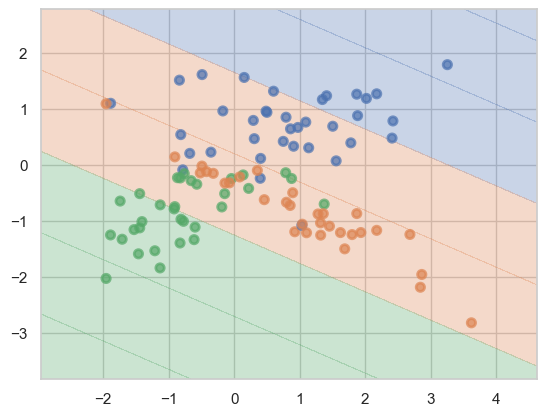

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


Датасет: Circles


100%|██████████| 11/11 [00:00<00:00, 98.03it/s]

Best params:  {'depth': 4, 'min_samples_leaf': 6, 'score': 0.8666666666666667}
Accuracy на обучающей выборке: 0.9286
Accuracy на тестовой выборке: 0.8667
Разность (переобучение): 0.0619



Датасет: Moons


100%|██████████| 11/11 [00:00<00:00, 100.53it/s]


Best params:  {'depth': 2, 'min_samples_leaf': 1, 'score': 0.9333333333333333}
Accuracy на обучающей выборке: 0.9286
Accuracy на тестовой выборке: 0.9333
Разность (переобучение): -0.0048

Датасет: Classification


100%|██████████| 11/11 [00:00<00:00, 103.61it/s]


Best params:  {'depth': 2, 'min_samples_leaf': 1, 'score': 0.8333333333333334}
Accuracy на обучающей выборке: 0.9000
Accuracy на тестовой выборке: 0.8333
Разность (переобучение): 0.0667


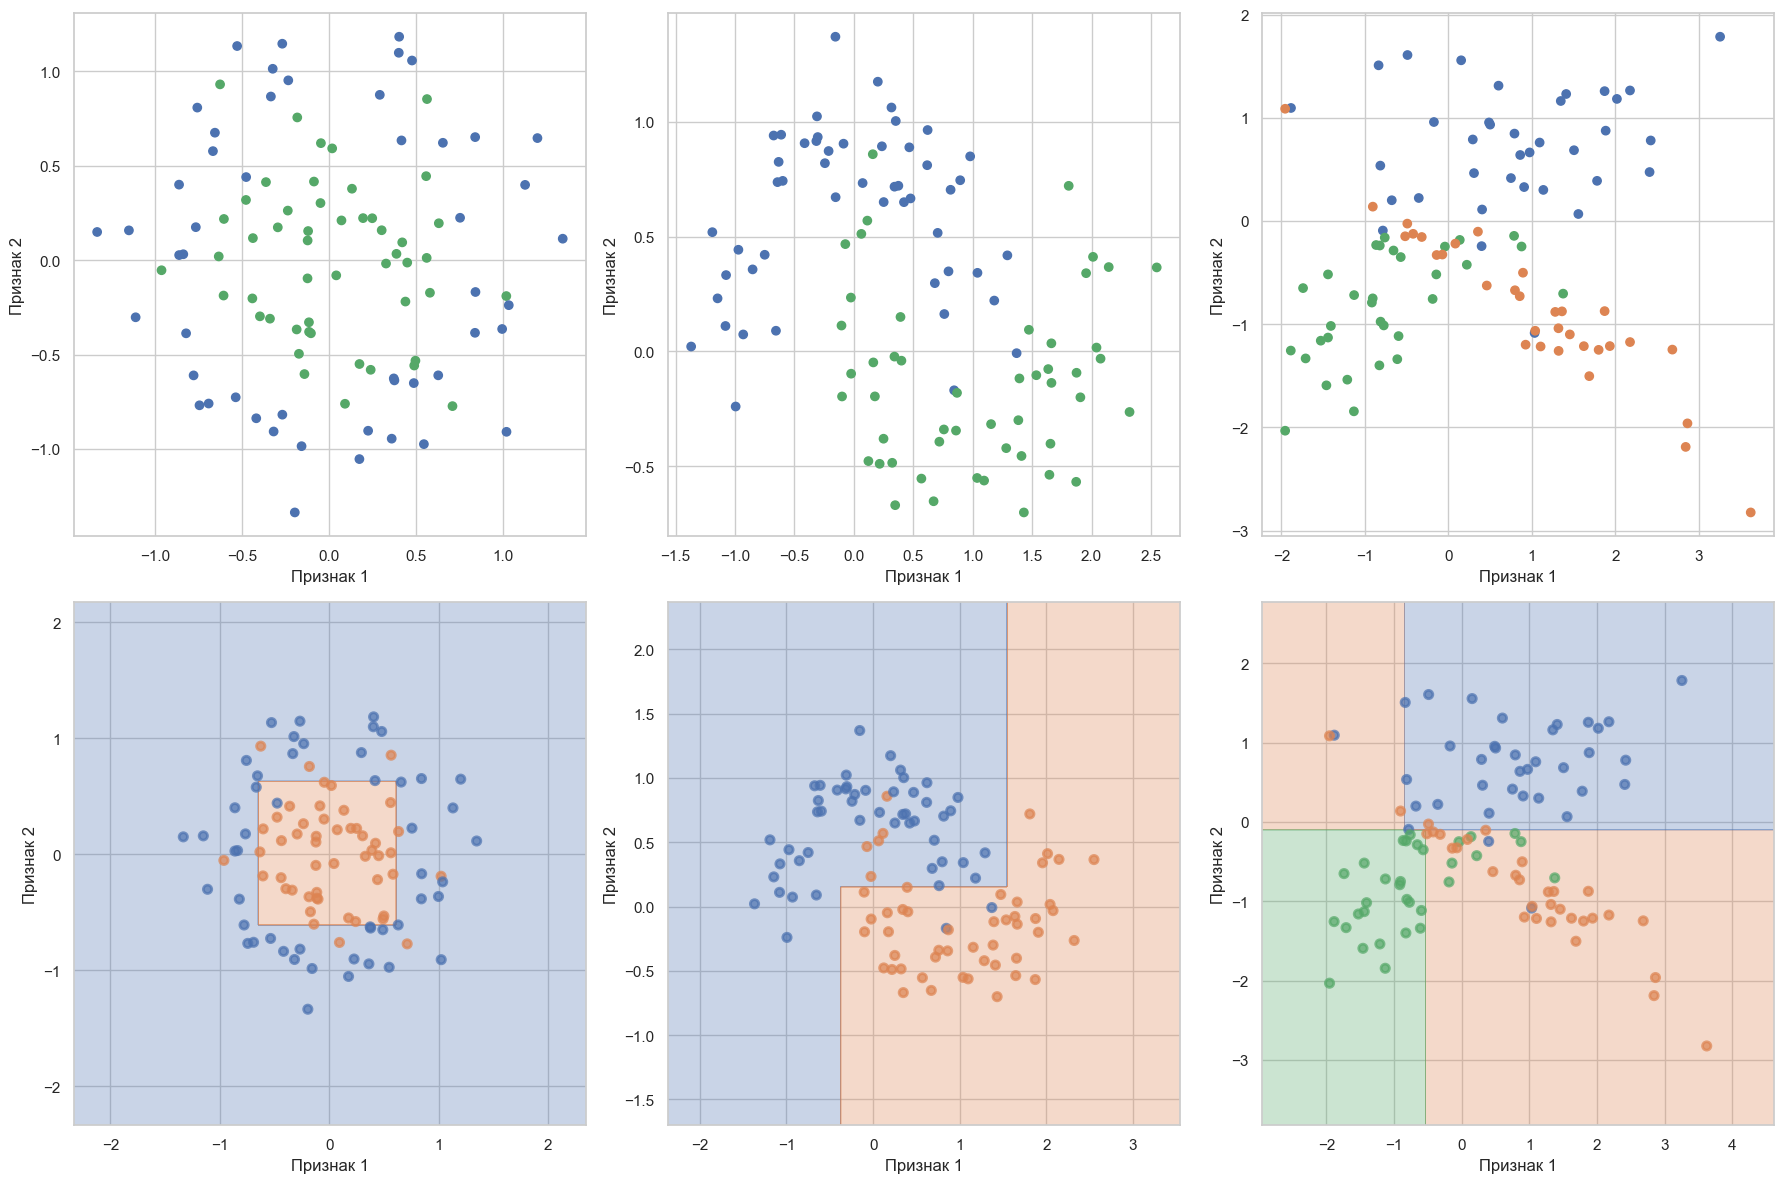

In [ ]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
# from tree_code import DecisionTree

def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

dataset_names = ['Circles', 'Moons', 'Classification']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (X, y) in enumerate(datasets):
    print(f"\n{'='*50}")
    print(f"Датасет: {dataset_names[i]}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    best_params = {"depth":0,"min_samples_leaf":0,"score":0}
    for max_depth in tqdm(range(11,0,-1)):
        for min_samples_leaf in range(11,0,-1):
            clf = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)
    
            y_train_pred = clf.predict(X_train)
            y_test_pred = clf.predict(X_test)
    
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            if test_accuracy >= best_params["score"]:
                best_params["score"] = test_accuracy
                best_params["depth"] = max_depth
                best_params["min_samples_leaf"] = min_samples_leaf

    print("Best params: ",best_params)
    clf = DecisionTreeClassifier(max_depth=best_params['depth'],min_samples_leaf=best_params["min_samples_leaf"])
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Accuracy на обучающей выборке: {train_accuracy:.4f}")
    print(f"Accuracy на тестовой выборке: {test_accuracy:.4f}")
    print(f"Разность (переобучение): {train_accuracy - test_accuracy:.4f}")
    
    plt.subplot(2, 3, i + 1)
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    
    plt.subplot(2, 3, i + 4)
    plot_surface(clf, X, y)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()


__Ответ:__ Для первого датасета потребовалась глубина больше. Полагаю это связано с большим числом разделяющих поверхностей.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

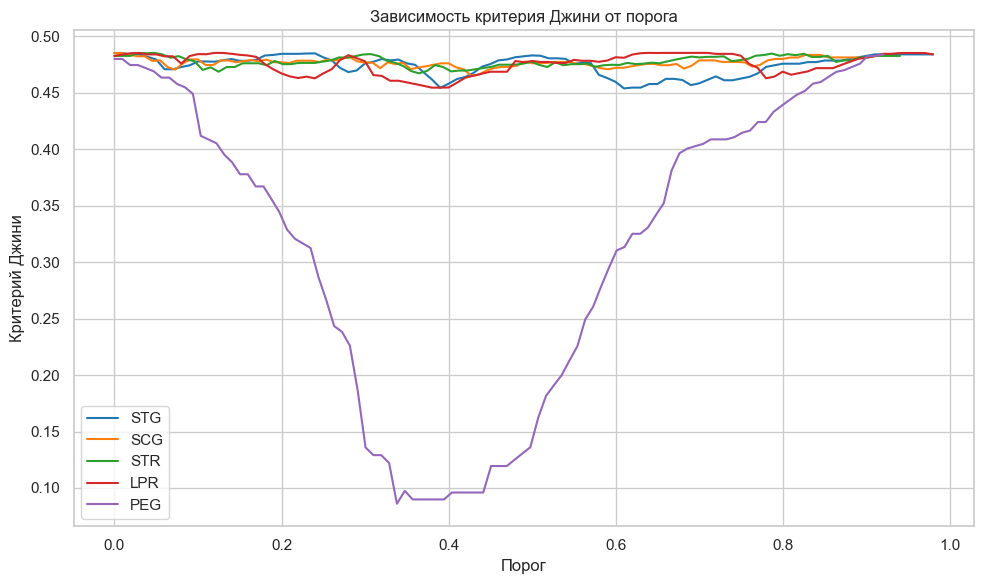

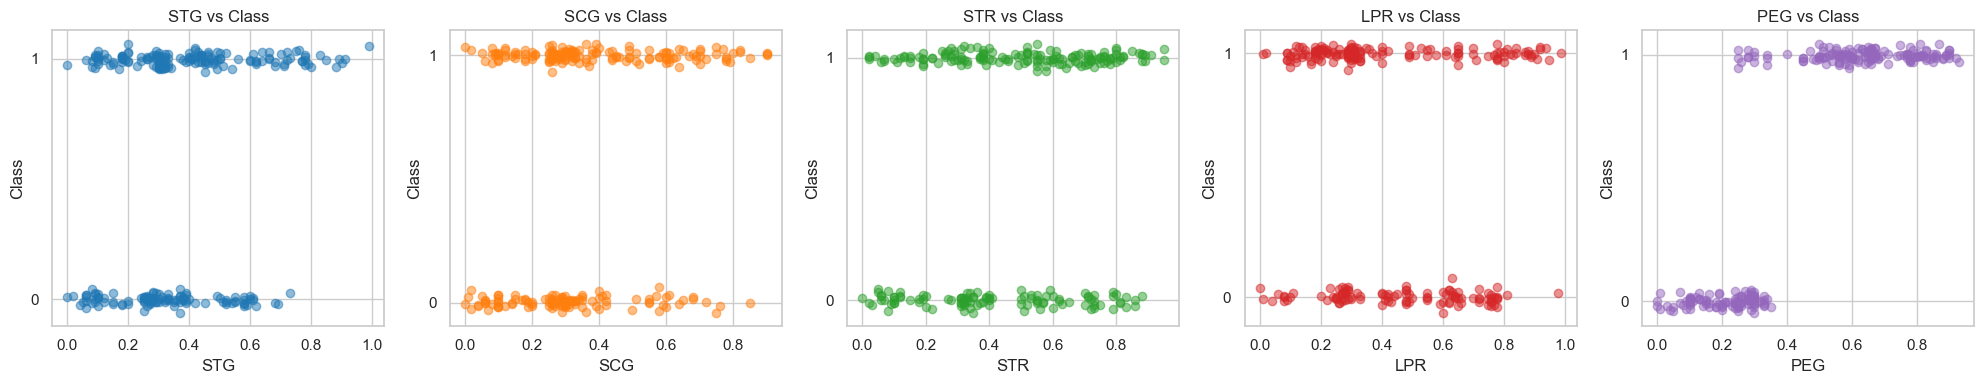

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('students.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Функция для вычисления критерия Джини
def gini_impurity(y_left, y_right):
    def gini(y):
        _, counts = np.unique(y, return_counts=True)
        prob = counts / counts.sum()
        return 1 - np.sum(prob ** 2)
    n = len(y_left) + len(y_right)
    return (len(y_left) / n) * gini(y_left) + (len(y_right) / n) * gini(y_right)


fig, axs = plt.subplots(1, 1, figsize=(10, 6))
colors = sns.color_palette("tab10", n_colors=X.shape[1])

for idx, column in enumerate(X.columns):
    thresholds = np.linspace(X[column].min(), X[column].max(), 100)
    ginis = []
    for thresh in thresholds:
        left = y[X[column] <= thresh]
        right = y[X[column] > thresh]
        if len(left) == 0 or len(right) == 0:
            ginis.append(np.nan)
        else:
            ginis.append(gini_impurity(left, right))
    axs.plot(thresholds, ginis, label=column, color=colors[idx])

axs.set_title("Зависимость критерия Джини от порога")
axs.set_xlabel("Порог")
axs.set_ylabel("Критерий Джини")
axs.legend()
axs.grid(True)
plt.tight_layout()
plt.show()

# Построение scatter-графиков "значение признака — класс"
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for idx, column in enumerate(X.columns):
    axs[idx].scatter(X[column], y + np.random.normal(0, 0.02, size=len(y)), alpha=0.5, color=colors[idx])
    axs[idx].set_title(f"{column} vs Class")
    axs[idx].set_xlabel(column)
    axs[idx].set_ylabel("Class")
    axs[idx].set_yticks([0, 1])

plt.tight_layout()
plt.show()


__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** Я бы делил по признаку PEG. Видно, что по нему можно почти идеально разделить на 2 подвыборки. Хорошие признаки имеют U образную кривую. Признаки разделение по которым почти невозможно имеют вид пологой кривой около значения 0.5

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




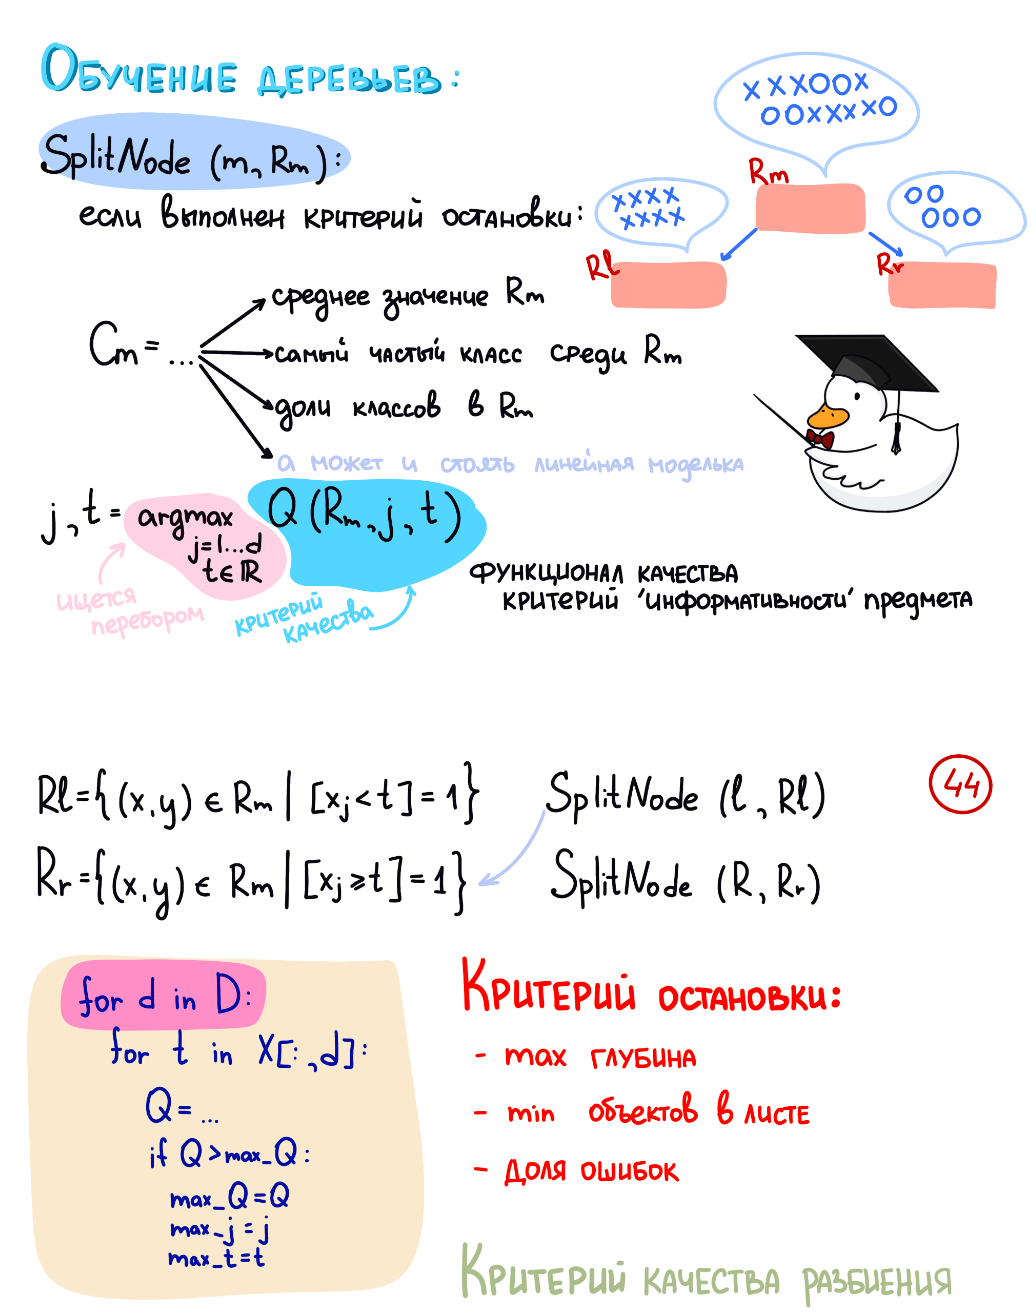

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("agaricus-lepiota.data", header=None)

X = df.drop(columns=[0])
y = df[0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True, stratify=y)
print(f"Train: {X_train.shape}, {y_train.shape}\nTest: {X_test.shape}, {y_test.shape}")

Train: (6093, 22), (6093,)
Test: (2031, 22), (2031,)


In [ ]:
encoders = {}
encoder_y = LabelEncoder()

for col in X_train.columns:
    encoders[col] = LabelEncoder()
    X_train[col] = encoders[col].fit_transform(X_train[col])
    X_test[col] = encoders[col].transform(X_test[col])

X_test.columns = list(range(len(X_test.columns)))
X_train.columns = list(range(len(X_train.columns)))

y_train = pd.Series(encoder_y.fit_transform(y_train),name="target")
y_test = pd.Series(encoder_y.transform(y_test),name="target")

display(X_train.sample(5))
display(y_train.sample(5))

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
6143,5,3,2,0,7,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,2
2285,5,2,5,0,1,1,1,1,5,0,...,2,7,7,0,2,1,4,2,4,0
6857,2,2,2,0,7,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2108,5,0,3,1,5,1,0,0,10,1,...,2,6,7,0,2,1,4,2,4,0
4334,5,3,3,0,2,1,0,0,3,0,...,1,0,6,0,2,1,2,1,5,1


901     1
2546    0
3786    1
5247    0
4614    0
Name: target, dtype: int64

In [13]:
from pprint import pprint
from tree_code import DecisionTree

feature_types = ["categorical"] * X_train.shape[1]
model = DecisionTree(feature_types=feature_types)

model.fit(X_train.to_numpy(),y_train.to_numpy())
preds = model.predict(X_test.to_numpy())

acc = accuracy_score(y_test,preds)
print(f"Accuracy: {acc}")
pprint(model._tree)

Accuracy: 1.0
{'categories_split': [np.int64(0), np.int64(3)],
 'feature_split': 4,
 'left_child': {'class': np.int64(0), 'type': 'terminal'},
 'right_child': {'categories_split': [np.int64(5)],
                 'feature_split': 4,
                 'left_child': {'categories_split': [np.int64(3),
                                                     np.int64(2),
                                                     np.int64(1),
                                                     np.int64(0),
                                                     np.int64(8),
                                                     np.int64(4)],
                                'feature_split': 19,
                                'left_child': {'class': np.int64(0),
                                               'type': 'terminal'},
                                'right_child': {'categories_split': [np.int64(7)],
                                                'feature_split': 19,
                             

__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [32]:
df_res = pd.DataFrame()

## Mushrooms

In [ ]:
from tree_code import DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold

def label_encoding(X,y):
    encoders = {}
    encoder_y = LabelEncoder()

    X_train = X
    y_train = y

    for col in X_train.columns:
        encoders[col] = LabelEncoder()
        X_train[col] = encoders[col].fit_transform(X_train[col])
        
    y_train = pd.Series(encoder_y.fit_transform(y_train),name="target")

    return X_train, y_train

def load_and_prepare_data(path, target_col):
    df = pd.read_csv(path, header=None)
    if target_col < 0:
        target_col = df.shape[1] + target_col
    X = df.drop(columns=target_col)
    y = df[target_col].copy()

    if "car" in path:
        y = y.replace({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})

    if "nursery" in path:
        y = y.replace({
            'not_recom': 0, 'recommend': 0,
            'very_recom': 1, 'priority': 1, 'spec_prior': 1
        })

    return X, y

def ohe_for_all(X):
    X_ohe = pd.DataFrame(OneHotEncoder(sparse_output=False).fit_transform(X),index=X.index)
    X_train = pd.concat([X,X_ohe],axis=1)
    return X_train

def evaluate_model(clf, X, y): # Работает только с DecisionTreeClassifier
    scorer = make_scorer(accuracy_score)
    return np.mean(cross_val_score(clf, X, y, cv=10, scoring=scorer))

n_splits = 10

# 1
X, y = load_and_prepare_data("agaricus-lepiota.data", 0)
X_train, y_train = label_encoding(X,y)
display(X_train,y_train)
# ==================================================
feature_types = ["real"] * X_train.shape[1]
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTree(feature_types=feature_types)
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Only Real: {np.mean(scores)}")
# ==================================================
feature_types = ["categorical"] * X_train.shape[1]
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTree(feature_types=feature_types)
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Only Categorical: {np.mean(scores)}")
# ==================================================

X_train = ohe_for_all(X_train)
count_real_features = len(feature_types)
count_cat_features = X_train.shape[1] - count_real_features
feature_types = ["real"] * count_real_features + ["categorical"] * count_cat_features
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTree(feature_types=feature_types)
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Real + OHE: {np.mean(scores)}")

# ==================================================

X_train = ohe_for_all(X_train)
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTreeClassifier()
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Sklearn: {evaluate_model(model,pd.DataFrame(y_train[test_idx]), pd.DataFrame(y_pred))}")

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: target, Length: 8124, dtype: int64

Only Real: 1.0
Only Categorical: 1.0
Real + OHE: 1.0
Sklearn: 1.0


## Cars

In [27]:
# 2
X, y = load_and_prepare_data("car.data", -1)
X_train, y_train = label_encoding(X,y)
display(X_train,y_train)
# ==================================================
feature_types = ["real"] * X_train.shape[1]
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTree(feature_types=feature_types)
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Only Real: {np.mean(scores)}")
# ==================================================
feature_types = ["categorical"] * X_train.shape[1]
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTree(feature_types=feature_types)
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Only Categorical: {np.mean(scores)}")
# ==================================================

X_train = ohe_for_all(X_train)
count_real_features = len(feature_types)
count_cat_features = X_train.shape[1] - count_real_features
feature_types = ["real"] * count_real_features + ["categorical"] * count_cat_features
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTree(feature_types=feature_types)
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Real + OHE: {np.mean(scores)}")

# ==================================================

X_train = ohe_for_all(X_train)
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTreeClassifier()
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])

print(f"Sklearn: {evaluate_model(model,pd.DataFrame(y_train[test_idx]), pd.DataFrame(y_pred))}")

,0,1,2,3,4,5
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


0       0
1       0
2       0
3       0
4       0
       ..
1723    1
1724    1
1725    0
1726    1
1727    1
Name: target, Length: 1728, dtype: int64

Only Real: 0.9901633284043554
Only Categorical: 0.9884292243581128
Real + OHE: 0.9872731549939507
Sklearn: 0.9882352941176471


## Nurseries

In [28]:
# 3
X, y = load_and_prepare_data("nursery.data", -1)
X_train, y_train = label_encoding(X,y)
display(X_train,y_train)
# ==================================================
feature_types = ["real"] * X_train.shape[1]
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTree(feature_types=feature_types)
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Only Real: {np.mean(scores)}")
# ==================================================
feature_types = ["categorical"] * X_train.shape[1]
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTree(feature_types=feature_types)
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Only Categorical: {np.mean(scores)}")
# ==================================================

X_train = ohe_for_all(X_train)
count_real_features = len(feature_types)
count_cat_features = X_train.shape[1] - count_real_features
feature_types = ["real"] * count_real_features + ["categorical"] * count_cat_features
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTree(feature_types=feature_types)
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Real + OHE: {np.mean(scores)}")

# ==================================================

X_train = ohe_for_all(X_train)
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTreeClassifier()
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Sklearn: {evaluate_model(model,pd.DataFrame(y_train[test_idx]), pd.DataFrame(y_pred))}")

,0,1,2,3,4,5,6,7
0,2,3,0,0,0,0,0,2
1,2,3,0,0,0,0,0,1
2,2,3,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2
4,2,3,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1
12956,0,4,2,3,1,1,2,0
12957,0,4,2,3,1,1,1,2
12958,0,4,2,3,1,1,1,1


0        0
1        1
2        0
3        0
4        1
        ..
12955    1
12956    0
12957    1
12958    1
12959    0
Name: target, Length: 12960, dtype: int64

Only Real: 0.9997685185185186
Only Categorical: 0.9997685185185186
Real + OHE: 0.9997685185185186
Sklearn: 1.0


## TicTacToe

In [29]:
# 4
X, y = load_and_prepare_data("tic-tac-toe-endgame.csv", -1)
X_train, y_train = label_encoding(X,y)
display(X_train,y_train)
# ==================================================
feature_types = ["real"] * X_train.shape[1]
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTree(feature_types=feature_types)
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Only Real: {np.mean(scores)}")
# ==================================================
feature_types = ["categorical"] * X_train.shape[1]
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTree(feature_types=feature_types)
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Only Categorical: {np.mean(scores)}")
# ==================================================

X_train = ohe_for_all(X_train)
count_real_features = len(feature_types)
count_cat_features = X_train.shape[1] - count_real_features
feature_types = ["real"] * count_real_features + ["categorical"] * count_cat_features
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTree(feature_types=feature_types)
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Real + OHE: {np.mean(scores)}")

# ==================================================

X_train = ohe_for_all(X_train)
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in kf.split(X_train):
    model = DecisionTreeClassifier()
    model.fit(X_train.to_numpy()[train_idx], y_train.to_numpy()[train_idx])
    y_pred = model.predict(X_train.to_numpy()[test_idx])
    scores.append(accuracy_score(y_train[test_idx], y_pred))

print(f"Sklearn: {evaluate_model(model,pd.DataFrame(y_train[test_idx]), pd.DataFrame(y_pred))}")

,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,0,0,0
1,3,3,3,3,2,2,3,2,2
2,3,3,3,3,2,2,2,3,2
3,3,3,3,3,2,2,2,2,3
4,3,3,3,3,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...
954,2,3,3,3,2,2,2,3,3
955,2,3,2,3,3,2,3,2,3
956,2,3,2,3,2,3,3,2,3
957,2,3,2,2,3,3,3,2,3


0      0
1      2
2      2
3      2
4      2
      ..
954    1
955    1
956    1
957    1
958    1
Name: target, Length: 959, dtype: int64

Only Real: 0.8759320175438597
Only Categorical: 0.9239035087719298
Real + OHE: 0.948936403508772
Sklearn: 0.9666666666666666


## Выводы

In [33]:
df_res["Mushrooms"] = {"Only Real": 1.0,"Only Categorical": 1.0,"Real + OHE": 1.0,"Sklearn": 1.0}
df_res["Cars"] = {"Only Real": 0.9901633284043554,"Only Categorical": 0.9884292243581128,"Real + OHE": 0.9872731549939507,"Sklearn": 0.9882352941176471}
df_res["Nurseries"] = {"Only Real": 0.9997685185185186,"Only Categorical": 0.9997685185185186,"Real + OHE": 0.9997685185185186,"Sklearn": 1.0}
df_res["TicTacToe"] = {"Only Real": 0.8759320175438597,"Only Categorical": 0.9239035087719298,"Real + OHE": 0.948936403508772,"Sklearn": 0.9666666666666666,}
df_res

,Mushrooms,Cars,Nurseries,TicTacToe
Only Real,1.0,0.990163,0.999769,0.875932
Only Categorical,1.0,0.988429,0.999769,0.923904
Real + OHE,1.0,0.987273,0.999769,0.948936
Sklearn,1.0,0.988235,1.000000,0.966667


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


Алгоритмы не одинаково ранжируются на разных датасетах из-за различий типов фичей в них.

В датасете Mushrooms судя по всему однозначно разделимый случай, поэтому каждый алгоритм справился идеально. При этом для OHE создаётся более 100 новых признаков.

В датасете Cars Лучше все себя показала попытка обучить дерево только на числовых данных так как там большинство данных именно числовые, а не категориальные.

В датасете Nurseries лучше остальных себя показала реализация от sklearn вероятно из-за каких-то трюков с правильной оптимизацией деревьев.

В датасете TicTacToe вариант с числовыми фичами показал себя очень плохо, так как данные в основном категориальные, а не регрессионные. Поэтому виден эффект от OHE и sklearn вырвался в победители,
возможно, благодаря альтернативному подходу работы с категориальными признаками.


# Как дела?

In [34]:
print("Хилимся живём)")

Хилимся живём)
